In [27]:
# LightGBM
from lightgbm import LGBMRegressor
LGB = LGBMRegressor()
LGB.fit(Xtrain,Ytrain)
mean_squared_error(Ytest,np.exp(LGB.predict(Xtest))-1)

LGBMRegressor()

1985930.9725315666

In [26]:
from xgboost.sklearn import XGBRegressor
XGB = XGBRegressor()
XGB.fit(Xtrain,Ytrain)
mean_squared_error(Ytest,np.exp(XGB.predict(Xtest))-1)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

1626580.2911192125

In [25]:
from sklearn import tree
DT = tree.DecisionTreeRegressor()
DT.fit(Xtrain,Ytrain)
mean_squared_error(Ytest,np.exp(DT.predict(Xtest))-1)

DecisionTreeRegressor()

3627594.6922745164

In [23]:
# 随机森林
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(oob_score=True)
RF.fit(Xtrain,Ytrain)

# 测试集MSE评估
pred_RF = np.exp(RF.predict(Xtest))-1
mean_squared_error(Ytest,pred_RF)

RandomForestRegressor(oob_score=True)

1730051.431755255

In [22]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(Xtrain,Ytrain)
pred = np.exp(lr.predict(Xtest))-1
mean_squared_error(Ytest,pred)

LinearRegression()

2985971.6712929453

In [21]:
# 调整数据集，因为刚才取过了自然对数，为了保持两个模型数据一致
Xtrain = train[model4.params.index[1:]]
Ytrain = np.log(train['price']+1)

Xtest = test[model4.params.index[1:]]
Ytest = test['price']

In [17]:
from sklearn.metrics import mean_squared_error
# 因为刚建模的时候取了对数+1 ，现在需要变回来
pred = np.exp(model4.predict(test))-1
mean_squared_error(test['price'],pred)

2985971.684190202

In [16]:
model4= smf.ols(formula2,train).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      np.log(price + 1)   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                 9.199e+04
Date:                Sat, 29 Apr 2023   Prob (F-statistic):               0.00
Time:                        23:36:50   Log-Likelihood:                -1302.4
No. Observations:              101556   AIC:                             2653.
Df Residuals:                  101532   BIC:                             2882.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.063e+06   1.01e+05     10.542      0.000    8.66e+05    1.26e+06
model          0.0002   2.22e-05      8.757      0.000       0.000       0.000
brand         -0.0011      0.000     -9.435      0.000      -0.001      -0.001
bodyType   -9.665e-05      0.001     -0.169      0.866      -0.001       0.001
fuelType      -0.0062      0.002     -3.885      0.000      -0.009      -0.003
gearbox        0.0324      0.002     16.042      0.000       0.028       0.036
power          0.0002   7.25e-06     21.122      0.000       0.000       0.000
kilometer     -0.0098      0.000    -38.786      0.000      -0.010      -0.009
v_0        -2.426e+04   2301.760    -10.540      0.000   -2.88e+04   -1.97e+04
v_1        -5.726e+05   5.53e+04    -10.348      0.000   -6.81e+05   -4.64e+05
v_2        -2.104e+05   2.06e+04    -10.234      0.000   -2.51e+05    -1.7e+05
v_3          1.13e+04   1142.724      9.885      0.000    9055.757    1.35e+04
v_4         -115.5548     13.759     -8.399      0.000    -142.522     -88.588
v_5          462.0414    132.358      3.491      0.000     202.621     721.462
v_6         -230.4788     10.225    -22.540      0.000    -250.520    -210.437
v_7           79.6662     22.904      3.478      0.001      34.775     124.557
v_8           91.0064     35.296      2.578      0.010      21.827     160.186
v_9          121.8187     33.234      3.665      0.000      56.680     186.957
v_10       -4.776e+05   4.61e+04    -10.361      0.000   -5.68e+05   -3.87e+05
v_11        3.733e+05   3.62e+04     10.300      0.000    3.02e+05    4.44e+05
v_12        7.338e+04   7247.395     10.126      0.000    5.92e+04    8.76e+04
v_13         283.4518     32.411      8.746      0.000     219.927     346.977
v_14          -2.7563      0.377     -7.320      0.000      -3.494      -2.018
车龄             0.0131      0.000     31.861      0.000       0.012       0.014
==============================================================================
Omnibus:                     6536.536   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29491.789
Skew:                          -0.124   Prob(JB):                         0.00
Kurtosis:                       5.628   Cond. No.                     3.05e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.5e-12. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [36]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(xtrain,ytrain)
# knn.score(xtest,ytest)
from sklearn.metrics import mean_squared_error
mean_squared_error(ytest,knn.predict(xtest))

KNeighborsRegressor()

AttributeError: 'NoneType' object has no attribute 'split'

In [43]:
from sklearn import svm
svr = svm.SVR()
svr.fit(xtrain,ytrain)
mean_squared_error(ytest,svr.predict(xtest))

SVR()

KeyboardInterrupt: 

In [45]:
from sklearn import svm
svr = svm.LinearSVR
svr.fit(X=xtrain,y=ytrain)
mean_squared_error(ytest,svr.predict(xtest))

TypeError: LinearSVR.fit() missing 1 required positional argument: 'self'

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], 

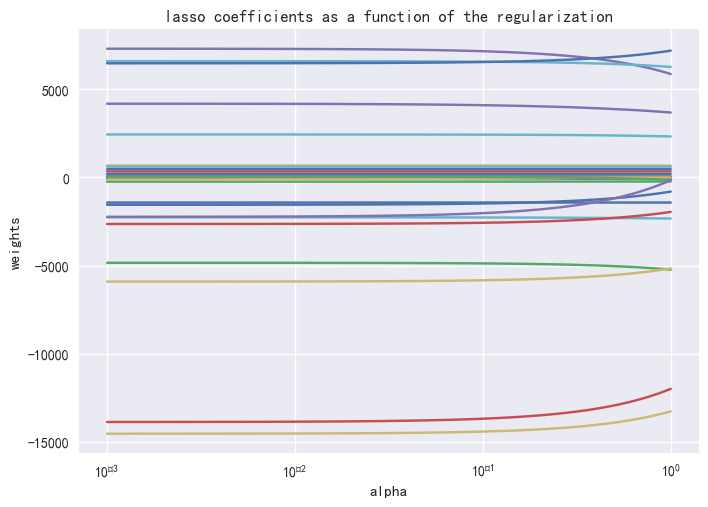

In [42]:
lasso_coefs=[]
for alpha in lasso_alphas:
    lasso.set_params(alpha=alpha)
    lasso.fit(xtrain,ytrain)
    lasso_coefs.append(lasso.coef_)
#为直观起见，输出轨迹图：
ax=plt.gca()
ax.plot(lasso_alphas,lasso_coefs)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("lasso coefficients as a function of the regularization")
plt.axis("tight")
plt.show();

In [41]:
# Lasso
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
lasso=Lasso()
lasso_alphas=np.logspace(-3,0,100,base=10)
lcv=LassoCV(alphas=lasso_alphas,cv=10)
lcv.fit(xtrain,ytrain)
print("the best alpha is {}".format(lcv.alpha_))
print("the r-square is {}".format(lcv.score(xtrain,ytrain)))

LassoCV(alphas=array([0.001     , 0.00107227, 0.00114976, 0.00123285, 0.00132194,
       0.00141747, 0.00151991, 0.00162975, 0.00174753, 0.00187382,
       0.00200923, 0.00215443, 0.00231013, 0.00247708, 0.00265609,
       0.00284804, 0.00305386, 0.00327455, 0.00351119, 0.00376494,
       0.00403702, 0.00432876, 0.00464159, 0.00497702, 0.0053367 ,
       0.00572237, 0.00613591, 0.00657933, 0.0070548 , 0.00756463,
       0.008...
       0.09326033, 0.1       , 0.10722672, 0.1149757 , 0.12328467,
       0.13219411, 0.14174742, 0.15199111, 0.16297508, 0.17475284,
       0.18738174, 0.2009233 , 0.21544347, 0.23101297, 0.24770764,
       0.26560878, 0.28480359, 0.30538555, 0.32745492, 0.35111917,
       0.37649358, 0.40370173, 0.43287613, 0.46415888, 0.49770236,
       0.53366992, 0.57223677, 0.61359073, 0.65793322, 0.70548023,
       0.75646333, 0.81113083, 0.869749  , 0.93260335, 1.        ]),
        cv=10)

the best alpha is 0.001
the r-square is 0.705557778530927


Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


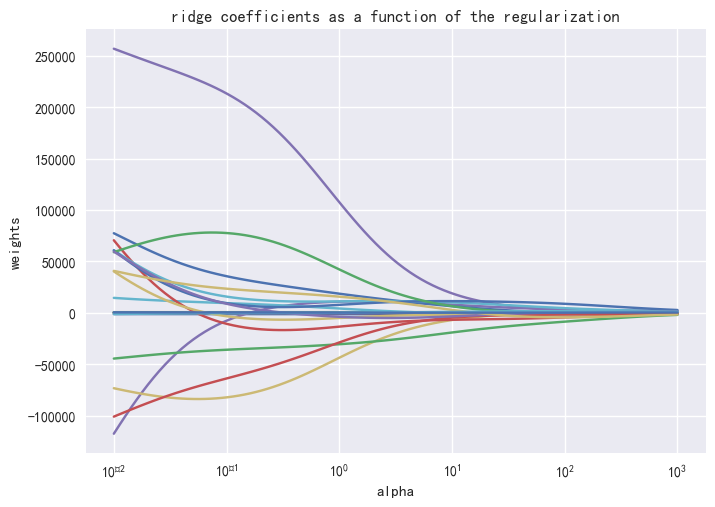

In [40]:
#使用岭迹图 自己手动选择a 值
#使用不同的正则参数生成一系列岭回归的模型
from sklearn.linear_model import Ridge
ridge=Ridge()
coefs=[]
for alpha in alphas:
    ridge.set_params(alpha=alpha)
    ridge.fit(xtrain,ytrain)
    coefs.append(ridge.coef_)
#绘制正则参数-回归系数图形
ax=plt.gca()
ax.plot(alphas,coefs)
ax.set_xscale("log")#设置x轴对数坐标
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("ridge coefficients as a function of the regularization")
plt.axis("tight")
plt.show();

In [39]:
rcv.coef_  # 收入与支出成反比，不正常
data3.columns

array([ 5.11025610e+02, -2.21309957e+02,  3.27647676e+02, -7.94888463e+01,
        6.25682188e+02,  5.87023118e+02, -1.25063101e+03,  1.19270180e+02,
        0.00000000e+00, -1.17550806e+05, -7.33058027e+04,  1.45210124e+04,
        7.73827947e+04, -4.44962130e+04,  7.05504936e+04,  2.56772655e+05,
        4.02494285e+04,  6.08127754e+04,  6.07532441e+04,  5.89326967e+04,
       -1.00939776e+05,  5.94798203e+04,  4.07711397e+04, -1.18308277e+03,
        4.38828504e+02])

Index(['model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'power',
       'kilometer', 'regionCode', 'offerType', 'v_0', 'v_1', 'v_2', 'v_3',
       'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12',
       'v_13', 'v_14', '车龄'],
      dtype='object')

In [37]:
#我们使用不同的正则化系数对模型进行交叉验证
from sklearn.linear_model import RidgeCV
alphas=np.logspace(-2,3,100,base=10)#正则化系数的搜索空间
rcv=RidgeCV(alphas=alphas,store_cv_values=True)
rcv.fit(xtrain,ytrain)
print("the best alpha is {}".format(rcv.alpha_))
print("the r-square is {}".format(rcv.score(xtrain,ytrain)))
print("the r-square is {}".format(rcv.score(xtest,ytest)))

RidgeCV(alphas=array([1.00000000e-02, 1.12332403e-02, 1.26185688e-02, 1.41747416e-02,
       1.59228279e-02, 1.78864953e-02, 2.00923300e-02, 2.25701972e-02,
       2.53536449e-02, 2.84803587e-02, 3.19926714e-02, 3.59381366e-02,
       4.03701726e-02, 4.53487851e-02, 5.09413801e-02, 5.72236766e-02,
       6.42807312e-02, 7.22080902e-02, 8.11130831e-02, 9.11162756e-02,
       1.02353102e-01, 1.14975700e-0...
       6.89261210e+01, 7.74263683e+01, 8.69749003e+01, 9.77009957e+01,
       1.09749877e+02, 1.23284674e+02, 1.38488637e+02, 1.55567614e+02,
       1.74752840e+02, 1.96304065e+02, 2.20513074e+02, 2.47707636e+02,
       2.78255940e+02, 3.12571585e+02, 3.51119173e+02, 3.94420606e+02,
       4.43062146e+02, 4.97702356e+02, 5.59081018e+02, 6.28029144e+02,
       7.05480231e+02, 7.92482898e+02, 8.90215085e+02, 1.00000000e+03]),
        store_cv_values=True)

the best alpha is 0.01
the r-square is 0.7192247701668391
the r-square is 0.7170220675654642


In [15]:
# 划分数据集
from sklearn.model_selection import train_test_split
train,test = train_test_split(data3,test_size=0.2,random_state=42)

In [34]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(data5,y,test_size=0.2,random_state=42)

In [29]:
data4.isnull().sum()

model         0
brand         0
bodyType      0
fuelType      0
gearbox       0
power         0
kilometer     0
regionCode    0
offerType     0
v_0           0
v_1           0
v_2           0
v_3           0
v_4           0
v_5           0
v_6           0
v_7           0
v_8           0
v_9           0
v_10          0
v_11          0
v_12          0
v_13          0
v_14          0
车龄            0
dtype: int64

In [33]:
from sklearn import preprocessing
data4=data3
y=data4.pop('price')
data5 = preprocessing.scale(data4)

In [31]:
data3.head()

,model,brand,bodyType,fuelType,gearbox,power,kilometer,regionCode,offerType,v_0,...,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,车龄
0,30.0,6,1.0,0.0,0.0,60,12.5,1046,0,43.357796,...,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762,12.0
1,40.0,1,2.0,0.0,0.0,0,15.0,4366,0,45.305273,...,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522,13.0
2,115.0,15,1.0,0.0,0.0,163,12.5,2806,0,45.978359,...,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963,12.0
3,109.0,10,0.0,0.0,1.0,193,15.0,434,0,45.687478,...,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699,20.0
4,110.0,5,1.0,0.0,0.0,68,5.0,6977,0,44.383511,...,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482,4.0


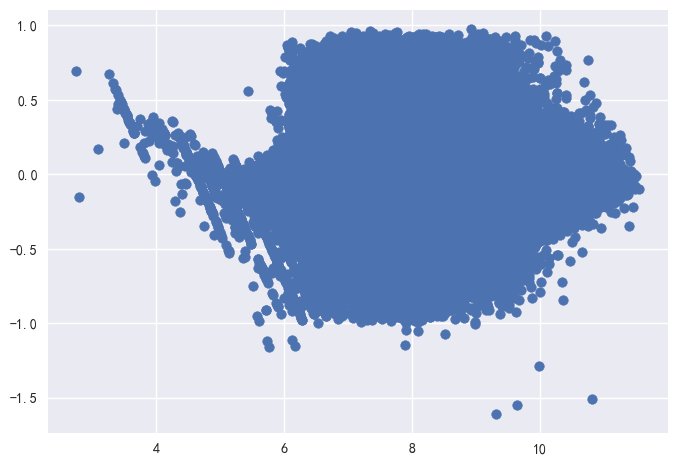

In [14]:
# 同方差 喇叭状开口的散点图是表示有问题
plt.scatter(model3.predict(data3),model3.resid)

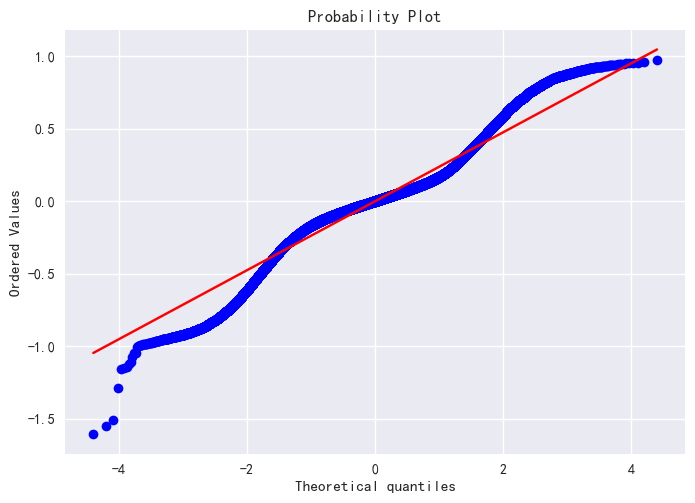

In [15]:
# 正态性
res = stats.probplot(model3.resid, plot=plt)

In [14]:
formula2 = 'np.log(price+1)~model+brand+bodyType+fuelType+gearbox+power+kilometer+v_0+v_1+v_2+v_3+v_4+v_5+v_6+v_7+v_8+v_9+v_10+v_11+v_12+v_13+v_14+车龄'
model3 = smf.ols(formula2,data3).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      np.log(price + 1)   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                 1.143e+05
Date:                Sun, 30 Apr 2023   Prob (F-statistic):               0.00
Time:                        14:55:56   Log-Likelihood:                -1954.3
No. Observations:              126946   AIC:                             3957.
Df Residuals:                  126922   BIC:                             4191.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.04e+06   9.04e+04     11.506      0.000    8.63e+05    1.22e+06
model          0.0002      2e-05      9.235      0.000       0.000       0.000
brand         -0.0011      0.000     -9.953      0.000      -0.001      -0.001
bodyType      -0.0004      0.001     -0.857      0.391      -0.001       0.001
fuelType      -0.0055      0.001     -3.846      0.000      -0.008      -0.003
gearbox        0.0326      0.002     17.972      0.000       0.029       0.036
power          0.0001   6.38e-06     23.296      0.000       0.000       0.000
kilometer     -0.0097      0.000    -42.582      0.000      -0.010      -0.009
v_0        -2.373e+04   2062.851    -11.504      0.000   -2.78e+04   -1.97e+04
v_1        -5.603e+05   4.96e+04    -11.297      0.000   -6.57e+05   -4.63e+05
v_2        -2.059e+05   1.84e+04    -11.174      0.000   -2.42e+05    -1.7e+05
v_3         1.106e+04   1024.101     10.798      0.000    9051.318    1.31e+04
v_4         -113.5084     12.330     -9.206      0.000    -137.676     -89.341
v_5          382.6185    118.419      3.231      0.001     150.519     614.718
v_6         -230.1158      9.111    -25.256      0.000    -247.974    -212.258
v_7           65.8724     20.492      3.215      0.001      25.709     106.035
v_8           69.3676     31.563      2.198      0.028       7.505     131.231
v_9          101.8462     29.736      3.425      0.001      43.564     160.128
v_10       -4.673e+05   4.13e+04    -11.311      0.000   -5.48e+05   -3.86e+05
v_11        3.653e+05   3.25e+04     11.245      0.000    3.02e+05    4.29e+05
v_12        7.182e+04   6495.093     11.058      0.000    5.91e+04    8.46e+04
v_13         278.0954     29.046      9.574      0.000     221.165     335.026
v_14          -2.7156      0.337     -8.047      0.000      -3.377      -2.054
车龄             0.0131      0.000     35.433      0.000       0.012       0.014
==============================================================================
Omnibus:                     8113.262   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36615.543
Skew:                          -0.117   Prob(JB):                         0.00
Kurtosis:                       5.621   Cond. No.                     3.07e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.38e-12. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [32]:
# 处理离群值（3倍标准差） ，可以跑完模型后再通过残差筛，看残差有没有超过3倍标准差的
data2.shape
z = np.abs(stats.zscore(model2.resid))
data3 = data2.loc[z<3,:] # 只能运行一次
data3.shape

(129710, 26)

(126946, 26)

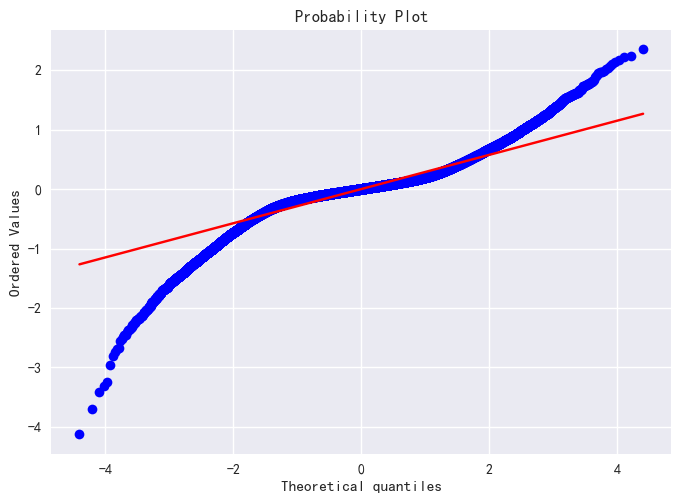

In [12]:
# 正态性
res = stats.probplot(model2.resid, plot=plt)

In [11]:
formula2 = 'np.log(price+1)~model+brand+bodyType+fuelType+gearbox+power+kilometer+v_0+v_1+v_2+v_3+v_4+v_5+v_6+v_7+v_8+v_9+v_10+v_11+v_12+v_13+v_14+车龄'
model2 = smf.ols(formula2,data2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      np.log(price + 1)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                 7.678e+04
Date:                Sun, 30 Apr 2023   Prob (F-statistic):               0.00
Time:                        14:55:33   Log-Likelihood:                -29662.
No. Observations:              129710   AIC:                         5.937e+04
Df Residuals:                  129686   BIC:                         5.961e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    9.62e+05   1.11e+05      8.693      0.000    7.45e+05    1.18e+06
model          0.0002   2.45e-05      9.989      0.000       0.000       0.000
brand         -0.0014      0.000    -10.477      0.000      -0.002      -0.001
bodyType      -0.0002      0.001     -0.394      0.693      -0.001       0.001
fuelType      -0.0051      0.002     -2.890      0.004      -0.009      -0.002
gearbox        0.0423      0.002     19.086      0.000       0.038       0.047
power       8.287e-05   5.34e-06     15.515      0.000    7.24e-05    9.33e-05
kilometer     -0.0097      0.000    -35.110      0.000      -0.010      -0.009
v_0        -2.194e+04   2524.995     -8.691      0.000   -2.69e+04    -1.7e+04
v_1         -5.15e+05   6.07e+04     -8.484      0.000   -6.34e+05   -3.96e+05
v_2        -1.886e+05   2.26e+04     -8.362      0.000   -2.33e+05   -1.44e+05
v_3         1.001e+04   1253.438      7.988      0.000    7555.561    1.25e+04
v_4          -96.6343     15.089     -6.404      0.000    -126.208     -67.061
v_5          122.4217    144.471      0.847      0.397    -160.740     405.583
v_6         -212.0053     11.031    -19.219      0.000    -233.625    -190.385
v_7           20.7403     25.000      0.830      0.407     -28.258      69.739
v_8           -9.0480     38.481     -0.235      0.814     -84.470      66.374
v_9           38.4759     36.280      1.061      0.289     -32.633     109.585
v_10       -4.298e+05   5.06e+04     -8.498      0.000   -5.29e+05   -3.31e+05
v_11        3.353e+05   3.98e+04      8.433      0.000    2.57e+05    4.13e+05
v_12        6.556e+04   7949.831      8.246      0.000       5e+04    8.11e+04
v_13         240.5702     35.546      6.768      0.000     170.901     310.239
v_14          -2.1634      0.413     -5.240      0.000      -2.973      -1.354
车龄             0.0052      0.000     11.779      0.000       0.004       0.006
==============================================================================
Omnibus:                    23934.952   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           289385.824
Skew:                          -0.534   Prob(JB):                         0.00
Kurtosis:                      10.239   Cond. No.                     3.61e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.48e-12. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

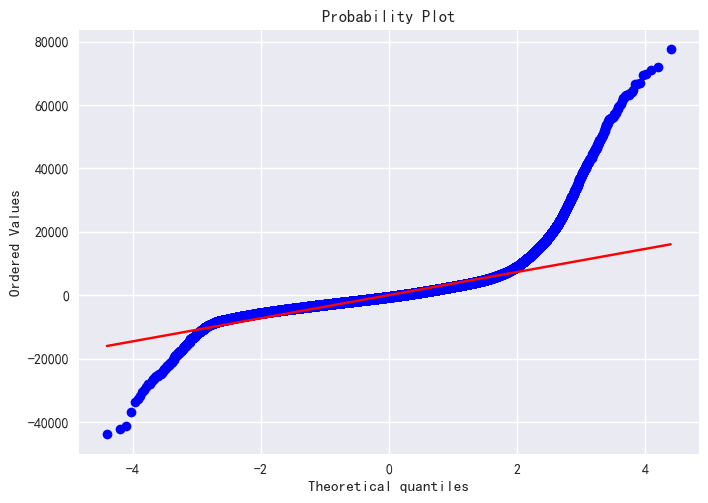

In [10]:
# 正态性
res = stats.probplot(model.resid, plot=plt)

In [9]:
# vif时，需手动添加截距项
#手动去除因变量
#手动添加截距项
data_vif = data2.drop(['price'], axis=1)
data_vif['Inter'] = 1  #相当于添加了截距项
#计算每个变量的VIF值 1-3正常，3-10岭回归处理，>10建议删除
for i in range(0,data_vif.shape[1]):
    print(data_vif.columns[i], vif(data_vif,i))

model 2.0913552560151447
brand 1.5232111777297146
bodyType 1.7299420956460032
fuelType 1.2956640932807528
gearbox 1.2251123137698439
power 1.0903594006530484
kilometer 1.649827594612624
regionCode 1.1390020153636478
offerType nan
v_0 32168568766932.113
v_1 inf
v_2 500399958596721.75
v_3 8347728688360.512
v_4 458910848.57861495
v_5 5752510.293937022
v_6 467723.0858875532
v_7 1645773.8864972955
v_8 1732939.9790272443
v_9 2312430.862344358
v_10 inf
v_11 9007199254740992.0
v_12 474063118670578.5
v_13 2954193226.510138
v_14 268934.4823616113
车龄 7.837234239034592
Inter 0.0


In [8]:
formula = 'price~model+brand+bodyType+fuelType+gearbox+power+kilometer+v_0+v_1+v_2+v_3+v_4+v_5+v_6+v_7+v_8+v_9+v_10+v_11+v_12+v_13+v_14+车龄'
model = smf.ols(formula,data2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                 1.372e+04
Date:                Sun, 30 Apr 2023   Prob (F-statistic):               0.00
Time:                        14:54:34   Log-Likelihood:            -1.2651e+06
No. Observations:              129710   AIC:                         2.530e+06
Df Residuals:                  129686   BIC:                         2.531e+06
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.833e+09   1.52e+09     -5.167      0.000   -1.08e+10   -4.86e+09
model         10.0791      0.335     30.075      0.000       9.422      10.736
brand        -17.7649      1.811     -9.811      0.000     -21.314     -14.216
bodyType     211.2236      8.597     24.568      0.000     194.373     228.074
fuelType    -159.7800     24.019     -6.652      0.000    -206.857    -112.703
gearbox     1552.7241     30.335     51.186      0.000    1493.268    1612.181
power          2.2618      0.073     30.914      0.000       2.118       2.405
kilometer   -323.8269      3.796    -85.312      0.000    -331.267    -316.387
v_0         1.786e+08   3.46e+07      5.165      0.000    1.11e+08    2.46e+08
v_1         4.418e+09   8.32e+08      5.313      0.000    2.79e+09    6.05e+09
v_2         1.668e+09   3.09e+08      5.398      0.000    1.06e+09    2.27e+09
v_3        -9.706e+07   1.72e+07     -5.653      0.000   -1.31e+08   -6.34e+07
v_4         1.363e+06   2.07e+05      6.596      0.000    9.58e+05    1.77e+06
v_5         1.401e+07   1.98e+06      7.077      0.000    1.01e+07    1.79e+07
v_6         5.061e+06   1.51e+05     33.494      0.000    4.76e+06    5.36e+06
v_7         2.476e+06   3.42e+05      7.230      0.000     1.8e+06    3.15e+06
v_8         4.527e+06   5.27e+05      8.589      0.000    3.49e+06    5.56e+06
v_9         3.978e+06   4.97e+05      8.006      0.000       3e+06    4.95e+06
v_10        3.674e+09   6.93e+08      5.303      0.000    2.32e+09    5.03e+09
v_11       -2.913e+09   5.45e+08     -5.349      0.000   -3.98e+09   -1.85e+09
v_12       -5.965e+08   1.09e+08     -5.477      0.000    -8.1e+08   -3.83e+08
v_13       -3.128e+06   4.87e+05     -6.425      0.000   -4.08e+06   -2.17e+06
v_14        4.081e+04   5655.719      7.216      0.000    2.97e+04    5.19e+04
车龄            80.2879      6.039     13.295      0.000      68.451      92.124
==============================================================================
Omnibus:                   110291.399   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7605596.326
Skew:                           3.719   Prob(JB):                         0.00
Kurtosis:                      39.769   Cond. No.                     3.61e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.48e-12. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [7]:
data2.head()

,model,brand,bodyType,fuelType,gearbox,power,kilometer,regionCode,offerType,price,...,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,车龄
0,30.0,6,1.0,0.0,0.0,60,12.5,1046,0,1850,...,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762,12.0
1,40.0,1,2.0,0.0,0.0,0,15.0,4366,0,3600,...,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522,13.0
2,115.0,15,1.0,0.0,0.0,163,12.5,2806,0,6222,...,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963,12.0
3,109.0,10,0.0,0.0,1.0,193,15.0,434,0,2400,...,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699,20.0
4,110.0,5,1.0,0.0,0.0,68,5.0,6977,0,5200,...,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482,4.0


In [6]:
data2 = data.drop(['SaleID','name','regDate','creatDate','notRepairedDamage','seller'],axis=1)

In [5]:
data.dropna(axis=0,inplace=True)

In [3]:
data['车龄']=pd.to_datetime(data['creatDate'].astype(str),errors='coerce').dt.year-pd.to_datetime(data['regDate'].astype(str),errors='coerce').dt.year

In [4]:
cat_columns = data.select_dtypes(include='O').columns
data[cat_columns]

,notRepairedDamage
0,0.0
1,-
2,0.0
3,0.0
4,0.0
...,...
149995,0.0
149996,0.0
149997,0.0
149998,0.0


In [3]:
data = pd.read_csv('used_car_train_20200313.csv',sep=' ')
data.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")
import os
os.chdir(r'C:\Users\fzh00\Desktop\文件\excel\阿里天池\二手车交易')
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
plt.style.use('seaborn')
#设置字体为黑色
plt.rcParams['font.family']='SimHei'
#显示符号
plt.rcParams['axes.unicode_minus']= False

In [2]:
os.__file__

'C:\\ProgramData\\Anaconda3\\envs\\cda_python\\lib\\os.py'